In [1]:
import torch
import torch.nn as nn
from matplotlib.pyplot import plot, title, axis
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

# Anatomy of a Learning Algorithm

1.) Loss function

2.) An optimization criteria based on the loss function (cost function, etc.) 

3.) An optimization routine leveraging training data to find a solution to the optimization criterion

## Gradient Descent

The optimization algorithm to be used to minimize some loss function

Our function: $f(x)$ = $w^Tx + b$
   - Remember, $w^Tx$ is the dot product

Loss function: $l = \frac{1}{N}\sum_{i=1}^N(y_i - (wx_i +b)^2$
 - Stick in our data point $x_i$ into our function to get the predicted value, and we square the difference between our predicted value and the actual value $y_i$. Summing over all errors and dividing by the amount of observations there are. 

**Goal**: Find the parameters $w, b$ of the function that minimize the loss function with gradient descent

In [35]:
data = load_diabetes()

X = data.data
print(X1.shape)
X[0]

(442, 10)


array([ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613])

In [36]:
y = data.target
print(y.shape)
y[0]

(442,)


151.0

/Users/gabestechschulte/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

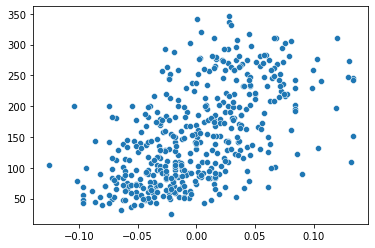

In [64]:
sns.scatterplot(X[:, 8], y)

In [37]:
#test_size = 0.3
#test_index = int(len(data) * (1 - test_size))
#X_train = data.iloc[: test_index]
#X_test = data.iloc[test_index:,]

#y_train = data.iloc[: test_index ]
#y_test = data.iloc[test_index:,  ]

### Multiple Linear Regression

In [38]:
print(X.shape)
X[4]

(442, 10)


array([ 0.00538306, -0.04464164, -0.03638469,  0.02187235,  0.00393485,
        0.01559614,  0.00814208, -0.00259226, -0.03199144, -0.04664087])

In [39]:
print(y.shape)
y[4]

(442,)


135.0

In [11]:
def loss_func(y, y_hat):
    N = len(y)
    error = 0.0
    for i in range(N):
        error += (y[i] - y_hat[i]) ** 2
    return error / N

In [22]:
def train(X, y, epochs, lr):
    w = np.zeros(X.shape[1])
    b = 0
    losslist = []
    
    # Gradient Descent
    for grad in range(epochs):
        # Predictions
        y_hat = np.dot(X, w) + b
        # Loss
        loss = loss_func(y, y_hat)
        losslist.append(loss)
        
        # Derivatives
        dl_dw = (1 / X.shape[0]) * (2 * np.dot(X.T, (y_hat - y)))
        dl_db = (1 / X.shape[0]) * (2 * np.sum(y_hat - y))
        
        # Updating parameters
        w -= lr * dl_dw
        b -= lr * dl_db
        
        #print('Epoch: ', grad, ' w: ', w, ' b:', b)
    
    return w, b, losslist

In [43]:
def predict(X, w, b):
    return np.dot(X, w) + b

In [40]:
w, b, loss = train(X, y, 1000, 10**-2)

In [ ]:
epochs = [grad for grad in range(1, 1001)]
len(epochs)
sns.lineplot(epochs, loss)

In [ ]:
predict(X, w, b)

### Simple Linear Regression

In [70]:
def update_w_b(X, y, w, b, lr):
    dl_dw = 0.0
    dl_db = 0.0
    
    N = len(X)
    
    for i in range(N):
        # Taking the derivative of our loss function with respect to "w1"
        dl_dw += -2 * X[i] * (y[i] - (w * X[i] + b))
        # Taking the derivative of our loss function with respect to "b"
        dl_db += -2 * (w * X[i] + b)
        
    # We now have a value for each of our derivatives, so we need to update our
    # parameters with this value
    w = w - (1 / float(N)) * dl_dw * lr
    b = b - (1 / float(N)) * dl_db * lr
    
    return w, b

In [71]:
update_w_b(width, weight, 0.0, 0.0, 10**-3)

(tensor(3.3863, dtype=torch.float64), tensor(0., dtype=torch.float64))

In [74]:
def training(X, y, w, b, lr, epochs):
    for e in range(epochs):
        w, b = update_w_b(X, y, w, b, lr)
        
        if e % 100 == 0:
            print('Epoch: ', e, 'Loss: ', loss(X, y, w, b))
            
    return w, b

In [ ]:
w, b, loss = training(width, weight, 0.0, 0.0, 10**-3, epochs=1000)

In [ ]:
sns.scatterplot(width, weight)
sns.lineplot(width, b + w*width, color='red')